# Here emotion prection was done by many to many mapping.Like input time steps were 8 & output time steps were 5.Then the average of 5 timesteps were taken.One hot code encoding was used.but it didn't give good result

In [1]:

#Loading The Dataset

import os
import fnmatch
import numpy as np

from sys     import argv
#from sklearn import svm

from load_features     import load_all
#from calc_scores       import calc_scores
#from write_predictions import write_predictions

# Set folders here
path_test_predictions = "D:/AVEC_17_Emotion_Sub-Challenge/result/"
b_test_available      = False  # If the test labels are not available, the predictions on test are written into the folder 'path_test_predictions'

# Folders wi o_features = "E:/AVEC_17_Emotion_Sub-Challenge/audio_features_xbow_6s/"
path_audio_features = "D:/AVEC_17_Emotion_Sub-Challenge/audio_features_xbow_6s/"
path_video_features = "D:/AVEC_17_Emotion_Sub-Challenge/video_features_xbow_6s/"
path_text_features  = "D:/AVEC_17_Emotion_Sub-Challenge/text_features_xbow_6s/"
path_labels         = "D:/AVEC_17_Emotion_Sub-Challenge/labels/"

sr_labels = 0.1

delay = 2.00
b_audio = True
b_video = True
b_text  = True
rise = 0.20


for k in range(1):
    print("Inside run_baseline.py")
    print(len(argv))
#if len(argv)>1:
     #delay = float(argv[1])
#if len(argv)>2:    
    #b_audio = bool(int(argv[2]))
    #b_video = bool(int(argv[3]))
    #b_text  = bool(int(argv[4]))

    print("argv")
    print(argv)
    print("delay")
    print(delay)

    path_features = []
    if b_audio:
        path_features.append( path_audio_features )
    if b_video:
        path_features.append( path_video_features )
    if b_text:
        path_features.append( path_text_features )
        

    if not b_test_available and not os.path.exists(path_test_predictions):
        os.mkdir(path_test_predictions)

# Compensate the delay (quick solution)
    shift = int(np.round(delay/sr_labels))
    shift = np.ones(len(path_features),dtype=int)*shift



    files_train = fnmatch.filter(os.listdir(path_features[0]), "Train*")  # Filenames are the same for audio, video, text & labels
    files_devel = fnmatch.filter(os.listdir(path_features[0]), "Devel*")
    files_test  = fnmatch.filter(os.listdir(path_features[0]), "Test*")



    print("i am going")
    print(files_train)

# Load features and labels
    Train   = load_all( files_train, path_features, shift )
    Devel   = load_all( files_devel, path_features, shift )
    Train_L = load_all( files_train, [ path_labels ] )  # Labels are not shifted
    Devel_L = load_all( files_devel, [ path_labels ] )


Inside run_baseline.py
3
argv
['c:\\users\\abhijit\\anaconda3\\envs\\tensorflow-gpu\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\abhijit\\AppData\\Roaming\\jupyter\\runtime\\kernel-55cadce9-ea76-44e5-be70-f3a418f7c3a1.json']
delay
2.0
i am going
['Train_01.csv', 'Train_02.csv', 'Train_03.csv', 'Train_04.csv', 'Train_05.csv', 'Train_06.csv', 'Train_07.csv', 'Train_08.csv', 'Train_09.csv', 'Train_10.csv', 'Train_11.csv', 'Train_12.csv', 'Train_13.csv', 'Train_14.csv', 'Train_15.csv', 'Train_16.csv', 'Train_17.csv', 'Train_18.csv', 'Train_19.csv', 'Train_20.csv', 'Train_21.csv', 'Train_22.csv', 'Train_23.csv', 'Train_24.csv', 'Train_25.csv', 'Train_26.csv', 'Train_27.csv', 'Train_28.csv', 'Train_29.csv', 'Train_30.csv', 'Train_31.csv', 'Train_32.csv', 'Train_33.csv', 'Train_34.csv']


In [2]:
Train_LA = Train_L[:,0]

In [3]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# one hot encoding  

In [4]:
#One_Hot_encoding for train dataset
#making the float numbers integer by multipling with 10
a =np.array([-.5 ,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0 ])

b = list()

for i in range(len(Train_LA)):
    c = Train_LA[i]
    
    for k in range(16):
        if(round(c*10) == round(a[k]*10)):
            create = a[k]*10
            
    b.append(create)
b.append(10)    
d = np.array(b)    

d[30:50]

array([4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 4.,
       4., 4., 4.])

In [5]:
#making one hot encoding

import numpy as np
from keras.utils import to_categorical


def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded


Y = encode(d)

c:\users\abhijit\anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Shape of data (BEFORE encode): (56093,)
Shape of data (AFTER  encode): (56093, 11)



In [8]:
#doing one hot encoding for developmet dataset

a =np.array([-.5 ,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0 ])

b = list()

for i in range(len(Devel_LA)):
    c = Devel_LA[i]
    
    for k in range(16):
        if(round(c*10) == round(a[k]*10)):
            create = a[k]*10
            
    b.append(create)    
e = np.array(b)    

e[30:50]

array([1., 2., 2., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4.])

In [9]:
#one hot encoding for devel set

def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded


DevelY = encode(e)

Shape of data (BEFORE encode): (22727,)
Shape of data (AFTER  encode): (22727, 11)



In [3]:
#windowing the dataset

def create_data(dataset,look_back=1):
    dataX = []
    for i in range(len(dataset)-look_back+1):
        a = dataset[i:i+look_back,:]
        dataX.append(a)
    return np.array(dataX)

In [4]:
TrainX = create_data(Train,8)

In [5]:
TrainX.shape

(56085, 8, 4521)

In [6]:

TrainY = Train_L[3:,0]

# Windowing the timestep

In [7]:
def create_data_Y(dataset,look_back=1):
    dataX = []
    for i in range(len(dataset)-look_back+1):
        a = dataset[i:i+look_back,]
        dataX.append(a)
    return np.array(dataX)

In [8]:
TrainY_ex = create_data_Y(TrainY,5)

In [9]:
TrainY_ex.shape

(56085, 5)

In [10]:
Train_shape = TrainY_ex.reshape(56085,5,1)

In [11]:


look_back = 8
Devel_X = create_data(Devel,look_back)



# The trainer 

In [15]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense,Activation,Dropout,RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

model = Sequential()
model.add(LSTM(256,input_shape=(look_back,4521),go_backwards=True,activation = 'linear'))
model.add(RepeatVector(5))
model.add(LSTM(256 ,go_backwards=True,return_sequences = True))
#model.add(LSTM(256,input_shape=(look_back,4521), return_sequences = True,go_backwards=True))
#model.add(LSTM(128,input_shape=(look_back,4521) ,return_sequences = True,go_backwards=True))
#model.add(LSTM(200,input_shape=(look_back,4521), return_sequences = True,go_backwards=True))
#model.add(LSTM(200,input_shape=(look_back,4521), return_sequences = True,go_backwards=True))
        #model.add(LSTM(200,input_shape=(look_back,4521),return_sequences = True,go_backwards=True))
        #model.add(LSTM(200,input_shape=(look_back,4521),return_sequences = True,go_backwards=True))
        #model.add(LSTM(200,input_shape=(look_back,4521),return_sequences = True,go_backwards=True))
#model.add(LSTM(200,input_shape=(look_back,4521),go_backwards=True))
model.add(TimeDistributed(Dense(1, activation= 'tanh' )))
model.compile(loss= 'mse' , optimizer= 'adam' , metrics=[ 'acc' ])
print(model.summary())

    
        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 256)               4892672   
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 5, 256)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 5, 256)            525312    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 5, 1)              257       
Total params: 5,418,241
Trainable params: 5,418,241
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('thesis_mult_task.h5', verbose=1, save_best_only=True)

results = model.fit(TrainX,Train_shape,epochs = 4,validation_split=0.2,callbacks=[earlystopper, checkpointer],batch_size = 32)
#model.fit(TrainX,TrainY_ex,epochs = 5,validation_split=0.2,batch_size = 32)


Train on 44868 samples, validate on 11217 samples
Epoch 1/4
44868/44868 [==============================] - 97s 2ms/step - loss: 0.0029 - acc: 0.0243 - val_loss: 0.0163 - val_acc: 0.0195

Epoch 00001: val_loss improved from inf to 0.01633, saving model to thesis_mult_task.h5
Epoch 2/4
44868/44868 [==============================] - 89s 2ms/step - loss: 0.0014 - acc: 0.0244 - val_loss: 0.0145 - val_acc: 0.0195

Epoch 00002: val_loss improved from 0.01633 to 0.01448, saving model to thesis_mult_task.h5
Epoch 3/4
44868/44868 [==============================] - 89s 2ms/step - loss: 0.0013 - acc: 0.0244 - val_loss: 0.0154 - val_acc: 0.0195

Epoch 00003: val_loss did not improve from 0.01448
Epoch 4/4
44868/44868 [==============================] - 89s 2ms/step - loss: 9.9034e-04 - acc: 0.0244 - val_loss: 0.0149 - val_acc: 0.0195

Epoch 00004: val_loss did not improve from 0.01448


# Evaluating the model

In [17]:
from keras.models import Model, load_model

model = load_model('thesis_mult_task.h5')

pred = model.predict(Devel_X)


# Calculating CCC,PCC,RMSE

In [61]:

pred2 = pred.reshape(len(pred),1,5)
pred_list = list()
for i in range(len(pred)):
    if i < 4:
        k = i
        temp = 0
        for j in range(i):
            temp = temp + (pred[k,j])
            #print(temp)
            k = k-1
        pred_list.append(temp/(j+1))
    else:
        k = i
        temp = 0
        for j in range(5):
            temp = temp+pred[k,j]
            k = k-1
        pred_list.append(temp/5)
            
            
pred_last = np.array(pred_list)       

In [62]:
pred_last.shape

(22720,)

In [74]:
output = list()

for i in range(len(pred)):
    
    j = np.mean(pred[i])
        
    m = np.mean(j)
    #new.append(m)
    output.append(j)

In [75]:
output_ = np.array(output)

In [77]:
pred = output_

In [76]:
#decoding from one hot encoding
#pred = output_
def decode(datum):
    return np.argmax(datum)
x = list()

for i in range(pred.shape[0]):
    datum = pred[i]
    print('index: %d' % i)
    print('encoded datum: %s' % datum)
    decoded_datum = decode(pred[i])
    print('decoded datum: %s' % decoded_datum)
    x.append(decoded_datum)
    
    

index: 0
encoded datum: [3.1841781e-02 9.3917245e-01 2.7164470e-02 1.2497840e-03 2.5036250e-04
 6.4577784e-05 1.3831855e-05 1.5626243e-05 1.5044870e-05 2.2814756e-05
 1.8932193e-04]
decoded datum: 1
index: 1
encoded datum: [3.1841781e-02 9.3917245e-01 2.7164470e-02 1.2497840e-03 2.5036250e-04
 6.4577784e-05 1.3831855e-05 1.5626243e-05 1.5044870e-05 2.2814756e-05
 1.8932193e-04]
decoded datum: 1
index: 2
encoded datum: [3.1841781e-02 9.3917245e-01 2.7164470e-02 1.2497840e-03 2.5036250e-04
 6.4577784e-05 1.3831855e-05 1.5626243e-05 1.5044870e-05 2.2814756e-05
 1.8932193e-04]
decoded datum: 1
index: 3
encoded datum: [3.1841781e-02 9.3917245e-01 2.7164470e-02 1.2497840e-03 2.5036250e-04
 6.4577784e-05 1.3831855e-05 1.5626243e-05 1.5044870e-05 2.2814756e-05
 1.8932193e-04]
decoded datum: 1
index: 4
encoded datum: [3.1841781e-02 9.3917245e-01 2.7164470e-02 1.2497840e-03 2.5036250e-04
 6.4577784e-05 1.3831855e-05 1.5626243e-05 1.5044870e-05 2.2814756e-05
 1.8932193e-04]
decoded datum: 1
index

encoded datum: [6.2852502e-03 4.1253448e-01 5.6999123e-01 1.0168346e-02 7.6266879e-04
 1.1092589e-04 1.9418712e-05 2.3349647e-05 1.7939055e-05 3.5973131e-05
 5.0417770e-05]
decoded datum: 2
index: 487
encoded datum: [6.1614485e-03 4.1648188e-01 5.6648934e-01 9.8613743e-03 7.4689707e-04
 1.0964788e-04 1.9525774e-05 2.3897248e-05 1.8295306e-05 3.6468009e-05
 5.1258015e-05]
decoded datum: 2
index: 488
encoded datum: [6.2404098e-03 4.3146181e-01 5.5232477e-01 9.0443892e-03 6.7932333e-04
 1.0253256e-04 1.8736213e-05 2.3270535e-05 1.7870823e-05 3.5767534e-05
 5.1147788e-05]
decoded datum: 2
index: 489
encoded datum: [6.0591316e-03 4.5925504e-01 5.2576417e-01 8.0754282e-03 6.1436830e-04
 9.3499279e-05 1.7402755e-05 2.2060318e-05 1.6772165e-05 3.3173328e-05
 4.9016839e-05]
decoded datum: 2
index: 490
encoded datum: [6.3526779e-03 4.9571767e-01 4.8982286e-01 7.3104659e-03 5.7296333e-04
 8.8165129e-05 1.6749344e-05 2.1433318e-05 1.6296262e-05 3.2085423e-05
 4.8630936e-05]
decoded datum: 1
index:

 1.0790259e-04]
decoded datum: 1
index: 940
encoded datum: [3.7924885e-03 4.7446051e-01 3.2415289e-01 1.0326443e-01 8.8957429e-02
 4.7603277e-03 2.1289503e-04 1.9067354e-04 4.3444452e-05 4.8512309e-05
 1.1639277e-04]
decoded datum: 1
index: 941
encoded datum: [3.6695446e-03 4.4787604e-01 3.0644843e-01 1.1799902e-01 1.1711204e-01
 6.2194015e-03 2.4949099e-04 2.1395125e-04 4.4527536e-05 4.7720307e-05
 1.1986151e-04]
decoded datum: 1
index: 942
encoded datum: [3.4478072e-03 3.7550506e-01 2.8388363e-01 1.4480552e-01 1.8225732e-01
 9.2892013e-03 3.2218939e-04 2.6495685e-04 4.7648577e-05 4.8895694e-05
 1.2779456e-04]
decoded datum: 1
index: 943
encoded datum: [3.0925805e-03 2.6411805e-01 2.4176629e-01 1.7260131e-01 3.0183133e-01
 1.5531247e-02 4.5595309e-04 3.5526106e-04 5.4581917e-05 5.2818028e-05
 1.4063387e-04]
decoded datum: 4
index: 944
encoded datum: [2.6820661e-03 1.8522732e-01 1.8921137e-01 1.7977373e-01 4.1981727e-01
 2.2058990e-02 5.6360505e-04 4.1620634e-04 5.5855333e-05 5.1677111

encoded datum: [3.4647298e-03 6.8203747e-01 3.1243280e-01 1.8217955e-03 1.3588493e-04
 2.7510920e-05 6.7073715e-06 1.1515395e-05 8.0678919e-06 1.7020204e-05
 3.6558544e-05]
decoded datum: 1
index: 1320
encoded datum: [3.6459933e-03 6.2946641e-01 3.6428204e-01 2.3246054e-03 1.5814684e-04
 3.1779131e-05 7.8378871e-06 1.3111862e-05 9.5945943e-06 2.0600561e-05
 3.9827886e-05]
decoded datum: 1
index: 1321
encoded datum: [3.8029072e-03 5.9807926e-01 3.9500570e-01 2.7971203e-03 1.7903306e-04
 3.5871595e-05 8.8914776e-06 1.4442869e-05 1.0878468e-05 2.3820523e-05
 4.2121141e-05]
decoded datum: 1
index: 1322
encoded datum: [3.9309282e-03 5.9484816e-01 3.9779240e-01 3.0893967e-03 1.9592201e-04
 3.8565195e-05 9.5613123e-06 1.5051650e-05 1.1456000e-05 2.5031059e-05
 4.3537257e-05]
decoded datum: 1
index: 1323
encoded datum: [4.0482036e-03 6.0069734e-01 3.9150986e-01 3.3763833e-03 2.1439625e-04
 4.1195992e-05 1.0400469e-05 1.6285077e-05 1.2526037e-05 2.6910686e-05
 4.6533118e-05]
decoded datum: 1
in

index: 1819
encoded datum: [2.8335457e-04 9.5906600e-02 8.9971685e-01 3.9498722e-03 9.2174057e-05
 1.5832073e-05 2.8926747e-06 5.4576940e-06 4.7715066e-06 1.0970733e-05
 1.1332524e-05]
decoded datum: 2
index: 1820
encoded datum: [3.8140931e-04 1.3946834e-01 8.5678321e-01 3.2189630e-03 9.2825117e-05
 1.6647702e-05 3.0812603e-06 5.9165886e-06 4.9940800e-06 1.1329292e-05
 1.3339255e-05]
decoded datum: 2
index: 1821
encoded datum: [5.4975983e-04 2.0141666e-01 7.9509461e-01 2.7754181e-03 9.9403143e-05
 1.8719042e-05 3.6197248e-06 6.8987720e-06 5.6231311e-06 1.2518582e-05
 1.6727703e-05]
decoded datum: 2
index: 1822
encoded datum: [7.33256224e-04 2.58797258e-01 7.37591445e-01 2.68394360e-03
 1.16334515e-04 2.23092648e-05 4.49192294e-06 8.51130517e-06
 6.77072512e-06 1.44642272e-05 2.11678162e-05]
decoded datum: 2
index: 1823
encoded datum: [1.0980994e-03 3.7882388e-01 6.1762655e-01 2.2331686e-03 1.2586245e-04
 2.5451949e-05 5.4372695e-06 1.0203228e-05 7.8418598e-06 1.5995522e-05
 2.7504144e-

index: 2311
encoded datum: [4.6096125e-01 3.3837098e-01 1.6765800e-01 2.6642239e-02 1.6189782e-03
 3.3339541e-04 1.7372740e-04 1.1001386e-04 1.9898622e-04 1.6263686e-03
 2.3060860e-03]
decoded datum: 0
index: 2312
encoded datum: [3.6736965e-01 3.5566923e-01 2.3131061e-01 3.9218467e-02 2.0745858e-03
 3.9026199e-04 1.8783293e-04 1.1481465e-04 2.0123794e-04 1.5111261e-03
 1.9522223e-03]
decoded datum: 0
index: 2313
encoded datum: [2.9539508e-01 3.6950269e-01 2.8290981e-01 4.6337642e-02 2.2155901e-03
 3.9269458e-04 1.7491780e-04 1.0542928e-04 1.8116254e-04 1.2515667e-03
 1.5334092e-03]
decoded datum: 1
index: 2314
encoded datum: [2.4763429e-01 3.6326283e-01 3.2837361e-01 5.5275083e-02 2.3716933e-03
 3.8802129e-04 1.6242593e-04 9.5848409e-05 1.6039603e-04 1.0549588e-03
 1.2208301e-03]
decoded datum: 1
index: 2315
encoded datum: [2.3086724e-01 3.6635336e-01 3.4420782e-01 5.3730834e-02 2.2361304e-03
 3.5311459e-04 1.4259621e-04 8.3177496e-05 1.3746170e-04 8.7756134e-04
 1.0107380e-03]
decoded

index: 2652
encoded datum: [8.2630635e-04 9.7028352e-03 8.0807257e-01 1.7910281e-01 1.6606614e-03
 2.0828882e-04 4.4817298e-05 4.2682695e-05 3.9951992e-05 2.0555823e-04
 9.3616487e-05]
decoded datum: 2
index: 2653
encoded datum: [1.1907818e-03 1.1748873e-02 8.1086457e-01 1.7358658e-01 1.7948856e-03
 2.3867907e-04 5.7829551e-05 5.4981472e-05 5.3638534e-05 2.7697877e-04
 1.3226786e-04]
decoded datum: 2
index: 2654
encoded datum: [1.8935123e-03 1.4062732e-02 8.0465490e-01 1.7622827e-01 1.9964827e-03
 2.8666819e-04 8.0295977e-05 7.4999829e-05 7.8106896e-05 4.3150797e-04
 2.1248986e-04]
decoded datum: 2
index: 2655
encoded datum: [2.93487217e-03 1.66241899e-02 7.98731625e-01 1.77823201e-01
 2.18202244e-03 3.41535429e-04 1.11105430e-04 1.02117563e-04
 1.14372655e-04 6.88028464e-04 3.46864923e-04]
decoded datum: 2
index: 2656
encoded datum: [4.5126299e-03 2.0420697e-02 8.0478001e-01 1.6554196e-01 2.2608372e-03
 3.9382171e-04 1.4862073e-04 1.3520822e-04 1.6328697e-04 1.0806642e-03
 5.6219433e-

index: 3152
encoded datum: [1.25900386e-02 1.77949026e-01 7.80295432e-01 2.76766811e-02
 9.42466315e-04 1.71473628e-04 4.44433390e-05 4.22274534e-05
 4.71461208e-05 1.18625365e-04 1.22527461e-04]
decoded datum: 2
index: 3153
encoded datum: [1.5379052e-02 1.9799450e-01 7.5820553e-01 2.6787128e-02 1.0162347e-03
 1.9177215e-04 4.9720595e-05 4.6766683e-05 5.2410545e-05 1.3354121e-04
 1.4333372e-04]
decoded datum: 2
index: 3154
encoded datum: [2.5077859e-02 2.5562850e-01 6.9288766e-01 2.4596939e-02 1.0862084e-03
 2.1359809e-04 5.7111047e-05 5.1423394e-05 5.9533042e-05 1.5891595e-04
 1.8217326e-04]
decoded datum: 2
index: 3155
encoded datum: [3.7750401e-02 2.9898340e-01 6.3573855e-01 2.5502687e-02 1.1965251e-03
 2.3855720e-04 6.5512555e-05 5.5057229e-05 6.6198387e-05 1.8518990e-04
 2.1793430e-04]
decoded datum: 2
index: 3156
encoded datum: [4.7834128e-02 3.1805599e-01 6.0397297e-01 2.7899850e-02 1.3252527e-03
 2.6141707e-04 7.2935189e-05 5.8015536e-05 7.1024529e-05 2.0625186e-04
 2.4213381e-

 1.9833291e-05]
decoded datum: 1
index: 3648
encoded datum: [3.7777059e-02 9.6196777e-01 2.2355533e-04 6.4958704e-06 3.4922246e-06
 8.0181616e-07 3.1296196e-07 2.7124969e-07 3.7130764e-07 8.0256757e-07
 1.9184890e-05]
decoded datum: 1
index: 3649
encoded datum: [3.4189336e-02 9.6555632e-01 2.2428136e-04 6.3792058e-06 3.4112006e-06
 7.7630074e-07 2.9512574e-07 2.5911839e-07 3.4737698e-07 7.4425117e-07
 1.7828497e-05]
decoded datum: 1
index: 3650
encoded datum: [2.9254932e-02 9.7048378e-01 2.3301214e-04 6.3898524e-06 3.3829776e-06
 7.5706333e-07 2.7613368e-07 2.4899759e-07 3.2018147e-07 6.7888857e-07
 1.6137023e-05]
decoded datum: 1
index: 3651
encoded datum: [3.0078176e-02 9.6965647e-01 2.3678798e-04 6.5126251e-06 3.4147306e-06
 7.6564493e-07 2.7988534e-07 2.5132812e-07 3.2366304e-07 6.9069836e-07
 1.6262024e-05]
decoded datum: 1
index: 3652
encoded datum: [2.6396047e-02 9.7333926e-01 2.3798228e-04 6.3127600e-06 3.3114225e-06
 7.3419358e-07 2.5835149e-07 2.3734943e-07 2.9628785e-07 6.24

index: 3985
encoded datum: [3.7592765e-02 9.6179020e-01 5.3217064e-04 1.7534414e-05 9.0984740e-06
 2.6509240e-06 1.0616286e-06 1.0747415e-06 1.3089373e-06 2.4969090e-06
 4.9734808e-05]
decoded datum: 1
index: 3986
encoded datum: [5.4550458e-02 9.4482106e-01 5.2910839e-04 1.9160190e-05 9.8143373e-06
 2.8535455e-06 1.2054190e-06 1.1419405e-06 1.5059004e-06 3.0031272e-06
 6.0656817e-05]
decoded datum: 1
index: 3987
encoded datum: [5.1928598e-02 9.4746751e-01 5.0935906e-04 1.8235520e-05 9.3858225e-06
 2.7132539e-06 1.1399873e-06 1.0835381e-06 1.4204290e-06 2.8287177e-06
 5.7675177e-05]
decoded datum: 1
index: 3988
encoded datum: [3.9164845e-02 9.6023732e-01 5.1259086e-04 1.7488050e-05 9.0547201e-06
 2.5923125e-06 1.0404331e-06 1.0413921e-06 1.2838174e-06 2.4438389e-06
 5.0280702e-05]
decoded datum: 1
index: 3989
encoded datum: [3.6105856e-02 9.6328861e-01 5.2394700e-04 1.7578672e-05 9.0210087e-06
 2.5306515e-06 9.8466489e-07 1.0085369e-06 1.2080949e-06 2.2391910e-06
 4.7021640e-05]
decoded

decoded datum: 10
index: 4485
encoded datum: [5.22583544e-01 1.27583800e-03 5.29558165e-05 3.31268893e-05
 3.19402316e-05 1.13241385e-05 2.02641495e-05 1.27976291e-05
 2.89133204e-05 1.10052037e-03 4.74848747e-01]
decoded datum: 0
index: 4486
encoded datum: [5.7563210e-01 1.3621658e-03 5.6113659e-05 3.4055505e-05 3.2452535e-05
 1.1528734e-05 2.0821813e-05 1.3048503e-05 2.9094346e-05 1.1196909e-03
 4.2168894e-01]
decoded datum: 0
index: 4487
encoded datum: [6.0757107e-01 1.5149893e-03 6.1860592e-05 3.6908612e-05 3.4954930e-05
 1.2559716e-05 2.2953252e-05 1.4464584e-05 3.1915937e-05 1.2079673e-03
 3.8949034e-01]
decoded datum: 0
index: 4488
encoded datum: [6.66592538e-01 1.67227292e-03 6.72186070e-05 3.97598342e-05
 3.66430249e-05 1.33968715e-05 2.47648768e-05 1.54914778e-05
 3.39134931e-05 1.26008689e-03 3.30243915e-01]
decoded datum: 0
index: 4489
encoded datum: [7.1986741e-01 1.7939223e-03 7.0289316e-05 4.0890583e-05 3.6793219e-05
 1.3480174e-05 2.5192709e-05 1.5684936e-05 3.4027507e-

decoded datum: 0
index: 4985
encoded datum: [9.9776107e-01 2.0158275e-03 2.9374603e-05 4.4797621e-06 1.8359930e-06
 7.0276047e-07 5.5004068e-07 2.3201790e-07 4.9800076e-07 9.0862986e-06
 1.7637375e-04]
decoded datum: 0
index: 4986
encoded datum: [9.9744970e-01 2.3184570e-03 3.4747332e-05 5.1545503e-06 2.0582465e-06
 7.8639476e-07 6.0762852e-07 2.5708587e-07 5.4793975e-07 9.7027059e-06
 1.7798145e-04]
decoded datum: 0
index: 4987
encoded datum: [9.97050941e-01 2.70239031e-03 4.13347843e-05 5.97600138e-06
 2.34454410e-06 8.91068453e-07 6.83737881e-07 2.92841548e-07
 6.18145975e-07 1.05915515e-05 1.83956785e-04]
decoded datum: 0
index: 4988
encoded datum: [9.9622107e-01 3.5115134e-03 5.3281179e-05 7.3848059e-06 2.8007439e-06
 1.0619589e-06 7.9781273e-07 3.4891090e-07 7.2911871e-07 1.1692106e-05
 1.8939475e-04]
decoded datum: 0
index: 4989
encoded datum: [9.94237304e-01 5.48009574e-03 7.39591997e-05 9.40486916e-06
 3.34685001e-06 1.24646226e-06 8.91896264e-07 4.09575762e-07
 8.45872535e-07

 2.8823023e-03]
decoded datum: 1
index: 5485
encoded datum: [1.8504107e-01 7.4884742e-01 5.9494644e-02 3.1161162e-03 5.5830920e-04
 1.9631973e-04 8.3883053e-05 9.2849434e-05 1.2903768e-04 3.6600648e-04
 2.0743634e-03]
decoded datum: 1
index: 5486
encoded datum: [1.2581493e-01 8.1724560e-01 5.2523594e-02 2.1173037e-03 4.1137659e-04
 1.4407178e-04 5.7362522e-05 6.9093992e-05 8.6857690e-05 2.1583708e-04
 1.3139794e-03]
decoded datum: 1
index: 5487
encoded datum: [7.2037369e-02 8.7925512e-01 4.5943439e-02 1.3794579e-03 2.9624486e-04
 9.9223631e-05 3.6100992e-05 4.7713991e-05 5.2420211e-05 1.1139150e-04
 7.4153923e-04]
decoded datum: 1
index: 5488
encoded datum: [3.6569759e-02 9.1855210e-01 4.3019880e-02 9.8263333e-04 2.3368662e-04
 7.2355513e-05 2.3933861e-05 3.4971705e-05 3.3349414e-05 6.0263665e-05
 4.1705315e-04]
decoded datum: 1
index: 5489
encoded datum: [2.3696315e-02 9.3798846e-01 3.6924146e-02 7.4579602e-04 1.9124200e-04
 5.6666420e-05 1.7981232e-05 2.7565324e-05 2.4193065e-05 3.96

encoded datum: [9.9672240e-01 3.0285618e-03 6.7007277e-05 1.3406173e-05 4.1556868e-06
 1.4108176e-06 9.4439810e-07 3.9927545e-07 7.8854390e-07 1.5307642e-05
 1.4556106e-04]
decoded datum: 0
index: 5985
encoded datum: [9.9827355e-01 1.5442813e-03 3.3435961e-05 6.8055160e-06 2.2778991e-06
 8.0828465e-07 5.9077189e-07 2.3775722e-07 5.0438973e-07 1.1325158e-05
 1.2623306e-04]
decoded datum: 0
index: 5986
encoded datum: [9.9878347e-01 1.0649033e-03 2.2513017e-05 4.5764427e-06 1.5955463e-06
 5.7713885e-07 4.4084271e-07 1.7472323e-07 3.8674779e-07 9.3111394e-06
 1.1191693e-04]
decoded datum: 0
index: 5987
encoded datum: [9.98961151e-01 8.98712780e-04 1.91682684e-05 3.96228552e-06
 1.37521988e-06 5.00047634e-07 3.85124309e-07 1.48654152e-07
 3.35696171e-07 8.48327727e-06 1.05719104e-04]
decoded datum: 0
index: 5988
encoded datum: [9.9876052e-01 1.0916818e-03 2.1675067e-05 4.4514882e-06 1.5265948e-06
 5.4963135e-07 4.2589903e-07 1.6789812e-07 3.7050981e-07 9.1341699e-06
 1.0944829e-04]
decoded 

index: 6484
encoded datum: [8.0219764e-01 1.9136696e-01 1.4399339e-03 1.3581393e-04 8.0617683e-05
 3.2148448e-05 2.4782415e-05 2.2919301e-05 4.1772619e-05 1.8604733e-04
 4.4713095e-03]
decoded datum: 0
index: 6485
encoded datum: [7.9846650e-01 1.9513252e-01 1.3483405e-03 1.3039411e-04 7.8104917e-05
 3.0871488e-05 2.4071511e-05 2.2411743e-05 4.0616942e-05 1.8025059e-04
 4.5458772e-03]
decoded datum: 0
index: 6486
encoded datum: [7.9054093e-01 2.0336099e-01 1.2555886e-03 1.2360064e-04 7.4759264e-05
 2.9319486e-05 2.3266535e-05 2.1887676e-05 3.9491333e-05 1.7219606e-04
 4.3580076e-03]
decoded datum: 0
index: 6487
encoded datum: [7.87733734e-01 2.07100987e-01 1.15562056e-03 1.11789486e-04
 6.63938845e-05 2.56006660e-05 1.99172009e-05 1.86426405e-05
 3.35750774e-05 1.44317775e-04 3.58943501e-03]
decoded datum: 0
index: 6488
encoded datum: [7.8601611e-01 2.0922728e-01 1.1431499e-03 1.0984595e-04 6.4257998e-05
 2.4672376e-05 1.9026793e-05 1.7785260e-05 3.2001884e-05 1.3576396e-04
 3.2102722e-

index: 6984
encoded datum: [6.3175387e-03 1.6840705e-01 6.3000095e-01 1.4215094e-01 4.1118048e-02
 1.0137977e-02 5.0254614e-04 3.5120113e-04 1.6117774e-04 3.1217322e-04
 5.4040883e-04]
decoded datum: 2
index: 6985
encoded datum: [4.8557920e-03 1.4625978e-01 6.4214981e-01 1.5630455e-01 3.9515704e-02
 9.3640173e-03 4.4478924e-04 3.0521181e-04 1.3166033e-04 2.5298231e-04
 4.1567232e-04]
decoded datum: 2
index: 6986
encoded datum: [3.9561330e-03 1.2780604e-01 6.4471948e-01 1.7246825e-01 4.0156551e-02
 9.4630569e-03 4.2691463e-04 2.9004118e-04 1.2191911e-04 2.3380306e-04
 3.5788398e-04]
decoded datum: 2
index: 6987
encoded datum: [4.3485868e-03 1.4875677e-01 6.4698064e-01 1.5845171e-01 3.2800548e-02
 7.3261545e-03 3.7048821e-04 2.5773089e-04 1.1717639e-04 2.3028767e-04
 3.5987800e-04]
decoded datum: 2
index: 6988
encoded datum: [4.0574591e-03 1.6721073e-01 6.3868254e-01 1.5348782e-01 2.9147571e-02
 6.2605389e-03 3.1879114e-04 2.2363658e-04 1.0198609e-04 1.9370420e-04
 3.1519253e-04]
decoded

decoded datum: 0
index: 7484
encoded datum: [9.2570370e-01 3.0661916e-02 7.2213514e-03 1.7674593e-03 3.8429556e-04
 1.1685173e-04 1.5097164e-04 6.5664244e-05 1.4753762e-04 4.9700541e-03
 2.8810125e-02]
decoded datum: 0
index: 7485
encoded datum: [9.19101834e-01 3.66680250e-02 7.34442612e-03 1.56975607e-03
 3.78881407e-04 1.19734395e-04 1.54759939e-04 6.94443370e-05
 1.54477180e-04 4.69364366e-03 2.97450367e-02]
decoded datum: 0
index: 7486
encoded datum: [9.1124308e-01 4.4856641e-02 7.4680173e-03 1.3051853e-03 3.4987420e-04
 1.1481375e-04 1.4963970e-04 6.9752125e-05 1.5545225e-04 4.3557431e-03
 2.9931897e-02]
decoded datum: 0
index: 7487
encoded datum: [8.81796062e-01 7.26422220e-02 1.13159465e-02 1.42133899e-03
 3.90389236e-04 1.32367029e-04 1.66443337e-04 8.17165928e-05
 1.83186436e-04 4.29671491e-03 2.75735315e-02]
decoded datum: 0
index: 7488
encoded datum: [7.9492724e-01 1.4882654e-01 2.8257618e-02 2.2590796e-03 5.3903298e-04
 1.9082408e-04 2.1075978e-04 1.1171879e-04 2.5580690e-0

decoded datum: 0
index: 7984
encoded datum: [9.99793887e-01 9.05264969e-05 1.77829247e-06 4.69568391e-07
 2.24794988e-07 7.16695823e-08 6.20107912e-08 2.90309004e-08
 6.71245388e-08 2.58842874e-06 1.10258756e-04]
decoded datum: 0
index: 7985
encoded datum: [9.9979913e-01 8.6317377e-05 1.6573758e-06 4.4000907e-07 2.1302682e-07
 6.7181041e-08 5.7839760e-08 2.7277917e-08 6.3109624e-08 2.4681074e-06
 1.0952208e-04]
decoded datum: 0
index: 7986
encoded datum: [9.9980342e-01 8.2530620e-05 1.5998892e-06 4.3372467e-07 2.1037454e-07
 6.5892927e-08 5.6523209e-08 2.6626713e-08 6.1920261e-08 2.4480214e-06
 1.0918292e-04]
decoded datum: 0
index: 7987
encoded datum: [9.99801517e-01 7.99742411e-05 1.57273007e-06 4.35180539e-07
 2.11821131e-07 6.61982753e-08 5.65819285e-08 2.66739075e-08
 6.20195024e-08 2.47627327e-06 1.13608665e-04]
decoded datum: 0
index: 7988
encoded datum: [9.9980116e-01 8.0912192e-05 1.6226404e-06 4.4594458e-07 2.1531100e-07
 6.7481444e-08 5.7049039e-08 2.6806253e-08 6.2037898e-0

 1.5558107e-04]
decoded datum: 0
index: 8484
encoded datum: [9.9959040e-01 2.4593613e-04 4.0756704e-06 8.9681464e-07 4.4884300e-07
 1.6453984e-07 1.2507303e-07 5.5604296e-08 1.2309189e-07 3.7577549e-06
 1.5399160e-04]
decoded datum: 0
index: 8485
encoded datum: [9.9958074e-01 2.5633824e-04 4.2730162e-06 9.2587226e-07 4.5905921e-07
 1.6807658e-07 1.2803099e-07 5.7001994e-08 1.2613677e-07 3.8209000e-06
 1.5297446e-04]
decoded datum: 0
index: 8486
encoded datum: [9.9955577e-01 2.6715879e-04 4.6425121e-06 1.0166918e-06 5.0584083e-07
 1.8635517e-07 1.4059555e-07 6.2715600e-08 1.3821088e-07 4.1243215e-06
 1.6625121e-04]
decoded datum: 0
index: 8487
encoded datum: [9.9952507e-01 2.8191527e-04 5.0710196e-06 1.1246990e-06 5.5817998e-07
 2.0754666e-07 1.5493534e-07 6.9194321e-08 1.5180942e-07 4.4674389e-06
 1.8121957e-04]
decoded datum: 0
index: 8488
encoded datum: [9.9951535e-01 2.9623677e-04 5.4266256e-06 1.1820700e-06 5.7590427e-07
 2.1497495e-07 1.5903717e-07 7.0926092e-08 1.5556391e-07 4.52

encoded datum: [9.99725699e-01 1.08417684e-04 1.90947048e-06 5.07062566e-07
 2.54400163e-07 8.39205470e-08 6.74496192e-08 3.12311172e-08
 7.04801479e-08 2.94791653e-06 1.59967603e-04]
decoded datum: 0
index: 8984
encoded datum: [9.9972802e-01 1.0869287e-04 1.9202969e-06 5.0729301e-07 2.5413721e-07
 8.3664816e-08 6.7217812e-08 3.1211449e-08 7.0389277e-08 2.9362445e-06
 1.5749523e-04]
decoded datum: 0
index: 8985
encoded datum: [9.9973708e-01 1.0811207e-04 1.9170907e-06 4.9738935e-07 2.4676964e-07
 8.0818559e-08 6.4549305e-08 2.9870638e-08 6.7385180e-08 2.8220970e-06
 1.4912548e-04]
decoded datum: 0
index: 8986
encoded datum: [9.9974203e-01 1.0690652e-04 1.9193506e-06 4.9305697e-07 2.4282252e-07
 7.9294111e-08 6.3104245e-08 2.9124232e-08 6.5862729e-08 2.7726564e-06
 1.4556100e-04]
decoded datum: 0
index: 8987
encoded datum: [9.9973488e-01 1.0711438e-04 1.9658298e-06 5.1073829e-07 2.5142339e-07
 8.2570736e-08 6.5214053e-08 2.9931147e-08 6.7574604e-08 2.8530562e-06
 1.5228261e-04]
decoded 

index: 9483
encoded datum: [9.9973983e-01 1.6050358e-04 2.2854706e-06 5.2740194e-07 2.8019153e-07
 9.4475340e-08 7.4996748e-08 3.4445712e-08 7.9397424e-08 2.8462960e-06
 9.3345334e-05]
decoded datum: 0
index: 9484
encoded datum: [9.9973261e-01 1.6129817e-04 2.2939225e-06 5.4490113e-07 2.9486745e-07
 9.9472558e-08 7.8866947e-08 3.6574125e-08 8.4192919e-08 3.0060687e-06
 9.9690558e-05]
decoded datum: 0
index: 9485
encoded datum: [9.9973327e-01 1.5935527e-04 2.2630670e-06 5.4631806e-07 2.9746300e-07
 1.0031857e-07 7.9798021e-08 3.7032354e-08 8.5150148e-08 3.0363328e-06
 1.0106652e-04]
decoded datum: 0
index: 9486
encoded datum: [9.99729753e-01 1.58745970e-04 2.23727739e-06 5.45157775e-07
 2.98338534e-07 1.00858244e-07 8.02907252e-08 3.72077373e-08
 8.59186144e-08 3.07109804e-06 1.05131221e-04]
decoded datum: 0
index: 9487
encoded datum: [9.9972963e-01 1.5868600e-04 2.1728126e-06 5.2556982e-07 2.9155348e-07
 9.8076399e-08 7.8117822e-08 3.6401893e-08 8.4530846e-08 3.0171816e-06
 1.0536605e-

index: 9983
encoded datum: [7.4216008e-01 2.5743866e-01 1.3460635e-04 1.5791924e-05 1.0329177e-05
 2.6392740e-06 1.7696851e-06 1.4157256e-06 2.7186738e-06 9.0197091e-06
 2.2299707e-04]
decoded datum: 0
index: 9984
encoded datum: [7.4425066e-01 2.5534934e-01 1.3474279e-04 1.5613854e-05 1.0126083e-05
 2.5860713e-06 1.7348732e-06 1.3881660e-06 2.6619823e-06 8.8599463e-06
 2.2223040e-04]
decoded datum: 0
index: 9985
encoded datum: [7.48705685e-01 2.50892550e-01 1.33556343e-04 1.55478956e-05
 1.00805155e-05 2.57346142e-06 1.74490992e-06 1.39186363e-06
 2.66994880e-06 8.91449781e-06 2.25304670e-04]
decoded datum: 0
index: 9986
encoded datum: [7.8211051e-01 2.1749565e-01 1.2426794e-04 1.4890344e-05 9.5633914e-06
 2.4525270e-06 1.6929025e-06 1.3366114e-06 2.5843021e-06 9.0856984e-06
 2.2795392e-04]
decoded datum: 0
index: 9987
encoded datum: [7.9590100e-01 2.0370233e-01 1.2345392e-04 1.4942275e-05 9.5158675e-06
 2.4627777e-06 1.7106298e-06 1.3433066e-06 2.6026789e-06 9.3593026e-06
 2.3126489e-

decoded datum: 0
index: 10483
encoded datum: [9.9409503e-01 5.6516123e-03 1.3705247e-04 2.8370423e-05 5.4859265e-06
 1.7653899e-06 7.2624414e-07 2.4598825e-07 4.9248598e-07 7.9809597e-06
 7.1295734e-05]
decoded datum: 0
index: 10484
encoded datum: [9.9346799e-01 6.2592612e-03 1.5215324e-04 3.0950010e-05 5.8908399e-06
 1.8637060e-06 7.6376199e-07 2.5779872e-07 5.1148834e-07 8.2101014e-06
 7.2125855e-05]
decoded datum: 0
index: 10485
encoded datum: [9.9274081e-01 6.9583715e-03 1.7589545e-04 3.5289191e-05 6.4568158e-06
 1.9935840e-06 7.9800986e-07 2.6143070e-07 5.1239272e-07 8.2534661e-06
 7.1338531e-05]
decoded datum: 0
index: 10486
encoded datum: [9.9169338e-01 7.9763625e-03 1.9854357e-04 3.9622188e-05 7.1240188e-06
 2.1618957e-06 8.5279925e-07 2.7926887e-07 5.4177360e-07 8.5047814e-06
 7.2666429e-05]
decoded datum: 0
index: 10487
encoded datum: [9.9056971e-01 9.0346877e-03 2.4705773e-04 5.0413062e-05 8.8086490e-06
 2.6072182e-06 1.0001643e-06 3.2098933e-07 6.0861936e-07 9.3987355e-06
 

decoded datum: 0
index: 10983
encoded datum: [5.4453981e-01 3.5214791e-01 5.3660411e-02 4.3209888e-02 5.0424887e-03
 5.5305776e-04 1.0308805e-04 3.4102868e-05 4.2611005e-05 2.4159714e-04
 4.2503519e-04]
decoded datum: 0
index: 10984
encoded datum: [6.1039054e-01 3.1509978e-01 4.0445782e-02 2.9300407e-02 3.5567298e-03
 4.2896945e-04 8.7740962e-05 2.8707320e-05 3.6925427e-05 2.1423827e-04
 4.1013700e-04]
decoded datum: 0
index: 10985
encoded datum: [6.6931999e-01 2.7604309e-01 3.0761614e-02 2.0290595e-02 2.5425120e-03
 3.3399591e-04 7.4448399e-05 2.4287619e-05 3.1756801e-05 1.8947078e-04
 3.8830255e-04]
decoded datum: 0
index: 10986
encoded datum: [7.5774187e-01 2.0845172e-01 1.9757774e-02 1.1655320e-02 1.5344450e-03
 2.3354357e-04 5.8011610e-05 1.8940977e-05 2.5521571e-05 1.6121540e-04
 3.6165357e-04]
decoded datum: 0
index: 10987
encoded datum: [8.3458936e-01 1.4634064e-01 1.1385749e-02 6.1276564e-03 8.7112782e-04
 1.5476698e-04 4.1477175e-05 1.3648397e-05 1.8815539e-05 1.2869450e-04
 

 3.6921649e-04]
decoded datum: 1
index: 11483
encoded datum: [3.3627564e-01 6.6247940e-01 7.7868247e-04 3.8931841e-05 2.0057214e-05
 7.2095413e-06 4.3654336e-06 3.7948546e-06 6.2803338e-06 1.6995959e-05
 3.6869865e-04]
decoded datum: 1
index: 11484
encoded datum: [3.2334867e-01 6.7539626e-01 8.2164689e-04 3.7490743e-05 1.9168414e-05
 6.9801254e-06 4.1997614e-06 3.6956055e-06 6.0181242e-06 1.6248983e-05
 3.3954059e-04]
decoded datum: 1
index: 11485
encoded datum: [3.0039185e-01 6.9835651e-01 8.5041748e-04 3.5801837e-05 1.8075305e-05
 6.6634407e-06 3.9699830e-06 3.5250309e-06 5.6800482e-06 1.5166304e-05
 3.1238730e-04]
decoded datum: 1
index: 11486
encoded datum: [2.7275768e-01 7.2608054e-01 8.1667770e-04 3.1352050e-05 1.5678184e-05
 5.7538346e-06 3.3535180e-06 3.0102601e-06 4.7633021e-06 1.2731948e-05
 2.6857873e-04]
decoded datum: 1
index: 11487
encoded datum: [2.60233104e-01 7.38520265e-01 8.99353647e-04 3.23726490e-05
 1.59079027e-05 5.92588549e-06 3.43107354e-06 3.11289182e-06
 4.87

encoded datum: [9.9016610e-04 9.7727048e-01 2.1531153e-02 1.4660374e-04 3.2781852e-05
 7.9471229e-06 1.7212927e-06 3.1945278e-06 1.6118599e-06 1.9808310e-06
 1.2277759e-05]
decoded datum: 1
index: 11983
encoded datum: [9.3622180e-04 9.8206168e-01 1.6838668e-02 1.1236618e-04 2.6522530e-05
 6.4935002e-06 1.4206678e-06 2.6530884e-06 1.3219873e-06 1.6480710e-06
 1.1002132e-05]
decoded datum: 1
index: 11984
encoded datum: [9.2795922e-04 9.8443139e-01 1.4494072e-02 9.8893863e-05 2.4472200e-05
 6.0311113e-06 1.3283749e-06 2.4902326e-06 1.2370583e-06 1.5445409e-06
 1.0643101e-05]
decoded datum: 1
index: 11985
encoded datum: [9.2069310e-04 9.8682296e-01 1.2126410e-02 8.5649008e-05 2.2320741e-05
 5.5453861e-06 1.2244038e-06 2.2989882e-06 1.1414328e-06 1.4322811e-06
 1.0298614e-05]
decoded datum: 1
index: 11986
encoded datum: [9.2836656e-04 9.8877573e-01 1.0180300e-02 7.4449730e-05 2.0432130e-05
 5.1178226e-06 1.1261087e-06 2.1194674e-06 1.0501645e-06 1.3254260e-06
 9.9946164e-06]
decoded datum: 

index: 12482
encoded datum: [8.3225423e-01 1.6571704e-01 9.4383571e-04 9.2394759e-05 3.4122408e-05
 1.1604044e-05 6.7704618e-06 5.2999408e-06 9.3431063e-06 4.1026400e-05
 8.8428415e-04]
decoded datum: 0
index: 12483
encoded datum: [7.9747188e-01 2.0038338e-01 9.8417304e-04 9.6615884e-05 3.7267659e-05
 1.2478062e-05 7.4276381e-06 5.9009813e-06 1.0298686e-05 4.1853957e-05
 9.4884820e-04]
decoded datum: 0
index: 12484
encoded datum: [7.7245104e-01 2.2518864e-01 1.0205113e-03 1.0365273e-04 4.1483974e-05
 1.3808727e-05 8.4410076e-06 6.7780202e-06 1.1811659e-05 4.5789522e-05
 1.1080636e-03]
decoded datum: 0
index: 12485
encoded datum: [7.68307567e-01 2.29308963e-01 1.00397528e-03 1.04615909e-04
 4.23638230e-05 1.39623135e-05 8.57873420e-06 6.86449584e-06
 1.19281776e-05 4.58051836e-05 1.14535983e-03]
decoded datum: 0
index: 12486
encoded datum: [7.6791352e-01 2.2964439e-01 9.7253668e-04 1.0529222e-04 4.3285858e-05
 1.4140520e-05 8.7299304e-06 6.9835805e-06 1.2080348e-05 4.6298002e-05
 1.2327

index: 12982
encoded datum: [9.89604354e-01 7.42855575e-03 6.44205255e-04 1.36675677e-04
 3.16132973e-05 1.08946351e-05 6.30083150e-06 2.29433181e-06
 4.61093305e-06 1.18897646e-04 2.01164815e-03]
decoded datum: 0
index: 12983
encoded datum: [9.8829567e-01 8.2252836e-03 8.0991833e-04 1.7984690e-04 3.9608662e-05
 1.3415622e-05 7.7170935e-06 2.7499148e-06 5.4919265e-06 1.4375556e-04
 2.2766055e-03]
decoded datum: 0
index: 12984
encoded datum: [9.8647946e-01 9.7176787e-03 1.0273968e-03 2.2518364e-04 4.8752398e-05
 1.6172286e-05 9.0596977e-06 3.2244657e-06 6.3597777e-06 1.5811053e-04
 2.3085538e-03]
decoded datum: 0
index: 12985
encoded datum: [9.8659772e-01 9.5729958e-03 1.0123567e-03 2.2195154e-04 4.8703398e-05
 1.6395981e-05 9.0223903e-06 3.1895052e-06 6.3056132e-06 1.5427973e-04
 2.3570948e-03]
decoded datum: 0
index: 12986
encoded datum: [9.8663962e-01 9.2857471e-03 9.8984397e-04 2.2625896e-04 4.9675473e-05
 1.6954496e-05 9.4041952e-06 3.2897619e-06 6.4991427e-06 1.6322735e-04
 2.6095

decoded datum: 1
index: 13482
encoded datum: [3.4533624e-02 7.9917359e-01 9.1575459e-02 3.8922250e-02 3.0877680e-02
 3.7306938e-03 2.7821696e-04 2.4041123e-04 1.1300079e-04 1.4335320e-04
 4.1169868e-04]
decoded datum: 1
index: 13483
encoded datum: [3.3317596e-02 8.2833421e-01 8.1086934e-02 3.0448157e-02 2.2881547e-02
 2.8854101e-03 2.3728705e-04 2.0642905e-04 9.9693345e-05 1.2654116e-04
 3.7610321e-04]
decoded datum: 1
index: 13484
encoded datum: [3.3028491e-02 8.7433112e-01 5.9268244e-02 1.8306892e-02 1.2528816e-02
 1.7078125e-03 1.7512967e-04 1.5183407e-04 7.8964171e-05 9.8436445e-05
 3.2431987e-04]
decoded datum: 1
index: 13485
encoded datum: [3.11752893e-02 9.06686604e-01 4.26244587e-02 1.08380737e-02
 7.01981317e-03 1.01717585e-03 1.25744191e-04 1.10459376e-04
 6.04345769e-05 7.38605886e-05 2.68096308e-04]
decoded datum: 1
index: 13486
encoded datum: [3.0444538e-02 9.2830563e-01 3.0188838e-02 6.2424303e-03 3.7668694e-03
 5.7607645e-04 8.4344261e-05 7.5604061e-05 4.3905020e-05 5.33

decoded datum: 1
index: 13982
encoded datum: [4.6720589e-03 9.9466908e-01 6.1717036e-04 1.4642780e-05 7.3917849e-06
 1.8100857e-06 4.6811266e-07 7.1776066e-07 5.0836172e-07 7.2667501e-07
 1.5360476e-05]
decoded datum: 1
index: 13983
encoded datum: [3.1439674e-03 9.9611902e-01 6.9972052e-04 1.4812320e-05 7.2478274e-06
 1.6851258e-06 3.9913016e-07 6.4710468e-07 4.1410004e-07 5.8069008e-07
 1.1560390e-05]
decoded datum: 1
index: 13984
encoded datum: [1.4129732e-03 9.9729884e-01 1.2341524e-03 2.5419551e-05 1.3190560e-05
 2.5595880e-06 5.1955061e-07 9.9989461e-07 5.0403378e-07 6.4553751e-07
 1.0234924e-05]
decoded datum: 1
index: 13985
encoded datum: [1.4129732e-03 9.9729884e-01 1.2341524e-03 2.5419551e-05 1.3190560e-05
 2.5595880e-06 5.1955061e-07 9.9989461e-07 5.0403378e-07 6.4553751e-07
 1.0234924e-05]
decoded datum: 1
index: 13986
encoded datum: [1.4129732e-03 9.9729884e-01 1.2341524e-03 2.5419551e-05 1.3190560e-05
 2.5595880e-06 5.1955061e-07 9.9989461e-07 5.0403378e-07 6.4553751e-07
 

 3.8453782e-05]
decoded datum: 1
index: 14482
encoded datum: [4.8137135e-03 9.6756923e-01 2.6970813e-02 4.5431833e-04 1.0823988e-04
 2.0636322e-05 5.2541677e-06 8.5416714e-06 5.5338946e-06 7.3733486e-06
 3.6197460e-05]
decoded datum: 1
index: 14483
encoded datum: [4.9037649e-03 9.7287905e-01 2.1703251e-02 3.5578347e-04 8.6203523e-05
 1.6856460e-05 4.3389814e-06 7.1053328e-06 4.5937954e-06 6.0980228e-06
 3.2947537e-05]
decoded datum: 1
index: 14484
encoded datum: [5.0292881e-03 9.7454894e-01 1.9943584e-02 3.2922794e-04 7.9666490e-05
 1.5774411e-05 4.1048343e-06 6.7158785e-06 4.3763625e-06 5.8348296e-06
 3.2496064e-05]
decoded datum: 1
index: 14485
encoded datum: [5.4986626e-03 9.7645169e-01 1.7615583e-02 2.9528458e-04 7.1286733e-05
 1.4470068e-05 3.8678290e-06 6.2667727e-06 4.1737053e-06 5.6232784e-06
 3.3021839e-05]
decoded datum: 1
index: 14486
encoded datum: [5.4283664e-03 9.7741288e-01 1.6757300e-02 2.7195585e-04 6.5409375e-05
 1.3515320e-05 3.5927212e-06 5.8182377e-06 3.8626231e-06

encoded datum: [4.7835289e-03 7.2657144e-01 2.6188546e-01 5.0633107e-03 1.0695843e-03
 2.5836041e-04 4.5213448e-05 5.9217979e-05 4.8052912e-05 6.2694904e-05
 1.5309502e-04]
decoded datum: 1
index: 14982
encoded datum: [4.4712145e-03 7.8423893e-01 2.0645145e-01 3.6275473e-03 7.6009962e-04
 1.7662716e-04 3.1988064e-05 4.3088789e-05 3.4240256e-05 4.3843342e-05
 1.2109232e-04]
decoded datum: 1
index: 14983
encoded datum: [4.4052410e-03 8.2609034e-01 1.6577831e-01 2.7579989e-03 5.9318601e-04
 1.3754467e-04 2.6155016e-05 3.5999215e-05 2.8522005e-05 3.6064870e-05
 1.1059438e-04]
decoded datum: 1
index: 14984
encoded datum: [4.7850581e-03 8.6988670e-01 1.2256173e-01 1.9770584e-03 4.6351310e-04
 1.0885279e-04 2.2209158e-05 3.0989901e-05 2.4692758e-05 3.0749194e-05
 1.0857907e-04]
decoded datum: 1
index: 14985
encoded datum: [5.3474037e-03 9.0555704e-01 8.7109350e-02 1.3572227e-03 3.4991381e-04
 8.3627900e-05 1.8339799e-05 2.6006112e-05 2.0542479e-05 2.5380092e-05
 1.0512686e-04]
decoded datum: 

index: 15481
encoded datum: [8.0245128e-03 6.1826992e-01 3.6562181e-01 6.2256441e-03 1.0193966e-03
 2.3438610e-04 5.1561197e-05 7.1418748e-05 6.7625297e-05 1.2923763e-04
 2.8450042e-04]
decoded datum: 1
index: 15482
encoded datum: [9.6509978e-03 6.3906485e-01 3.4377000e-01 5.6428979e-03 9.6188206e-04
 2.3545048e-04 5.3981366e-05 7.4743242e-05 7.3346091e-05 1.4237920e-04
 3.2955309e-04]
decoded datum: 1
index: 15483
encoded datum: [1.02334265e-02 6.61743999e-01 3.21307421e-01 4.96761454e-03
 8.70735967e-04 2.17286448e-04 5.09238052e-05 7.16428985e-05
 7.05321654e-05 1.35171955e-04 3.31293500e-04]
decoded datum: 1
index: 15484
encoded datum: [1.0617772e-02 6.9379586e-01 2.8983718e-01 4.1779079e-03 7.5526844e-04
 1.9507179e-04 4.6346307e-05 6.5567823e-05 6.4591055e-05 1.2218398e-04
 3.2222032e-04]
decoded datum: 1
index: 15485
encoded datum: [1.02229100e-02 7.08174884e-01 2.76398361e-01 3.74291022e-03
 6.97338313e-04 1.85671146e-04 4.31399421e-05 6.14407472e-05
 5.94806552e-05 1.10631656e

index: 15981
encoded datum: [0.06029104 0.46504617 0.2076046  0.13416696 0.08892764 0.03346456
 0.00334572 0.00159418 0.00096616 0.00147069 0.00312226]
decoded datum: 1
index: 15982
encoded datum: [0.06641954 0.43913326 0.20960423 0.14178245 0.0954406  0.03670052
 0.00352131 0.0016345  0.00098428 0.00160417 0.00317507]
decoded datum: 1
index: 15983
encoded datum: [0.06840035 0.40687203 0.2116259  0.15319292 0.10626262 0.04217518
 0.00382391 0.00172051 0.00101101 0.00173585 0.00317973]
decoded datum: 1
index: 15984
encoded datum: [0.07723114 0.41872448 0.20998447 0.1469486  0.09701411 0.03830025
 0.00373096 0.00171747 0.00106117 0.00193273 0.00335466]
decoded datum: 1
index: 15985
encoded datum: [0.08485764 0.4218068  0.20833094 0.143162   0.09150203 0.03797555
 0.00380741 0.00175048 0.00112039 0.00213736 0.00354941]
decoded datum: 1
index: 15986
encoded datum: [0.1036709  0.44357342 0.19769919 0.13119075 0.07779513 0.03299179
 0.00370601 0.00173989 0.00120015 0.00245619 0.00397658]
dec

decoded datum: 0
index: 16481
encoded datum: [6.3555539e-01 3.5622206e-01 4.6973880e-03 9.6382818e-04 3.6082929e-04
 1.1070954e-04 7.4624244e-05 5.4108627e-05 8.8432986e-05 2.7336419e-04
 1.5992777e-03]
decoded datum: 0
index: 16482
encoded datum: [6.5521848e-01 3.3687955e-01 4.3262541e-03 9.0470247e-04 3.4790279e-04
 1.0790051e-04 7.4829550e-05 5.4251577e-05 8.8860703e-05 2.8091256e-04
 1.7162862e-03]
decoded datum: 0
index: 16483
encoded datum: [6.8557990e-01 3.0719313e-01 3.8103578e-03 7.8982802e-04 3.0901938e-04
 9.7527853e-05 6.9400034e-05 5.0382390e-05 8.3244282e-05 2.7502293e-04
 1.7422123e-03]
decoded datum: 0
index: 16484
encoded datum: [6.8534291e-01 3.0746394e-01 3.7338198e-03 7.4432779e-04 2.9545900e-04
 9.5118638e-05 6.8661036e-05 5.0468334e-05 8.2995823e-05 2.7781221e-04
 1.8445529e-03]
decoded datum: 0
index: 16485
encoded datum: [6.8569314e-01 3.0765611e-01 3.3005190e-03 6.2237511e-04 2.5500421e-04
 8.2820094e-05 6.0375274e-05 4.4739641e-05 7.3861229e-05 2.4874500e-04
 

decoded datum: 2
index: 16981
encoded datum: [3.8014095e-02 1.5629992e-01 4.1343793e-01 3.5931635e-01 2.9031713e-02
 2.3207241e-03 3.4544541e-04 2.0077798e-04 1.3864705e-04 4.3626473e-04
 4.5814886e-04]
decoded datum: 2
index: 16982
encoded datum: [2.6901681e-02 1.2671933e-01 4.0862441e-01 4.0351701e-01 3.0474842e-02
 2.2944675e-03 3.4026848e-04 1.9866422e-04 1.2987999e-04 3.9590025e-04
 4.0348741e-04]
decoded datum: 2
index: 16983
encoded datum: [1.9936215e-02 1.0604514e-01 4.0759057e-01 4.3416891e-01 2.8773984e-02
 2.1350468e-03 3.2152605e-04 1.8849617e-04 1.2062347e-04 3.6520325e-04
 3.5428550e-04]
decoded datum: 3
index: 16984
encoded datum: [1.6311202e-02 9.7535215e-02 4.1402689e-01 4.4400924e-01 2.5023267e-02
 1.8770362e-03 2.8919821e-04 1.7051407e-04 1.1099524e-04 3.3427886e-04
 3.1214452e-04]
decoded datum: 3
index: 16985
encoded datum: [1.36998389e-02 9.26394016e-02 4.18266386e-01 4.49101746e-01
 2.34046578e-02 1.76212622e-03 2.70573131e-04 1.60783296e-04
 1.04452505e-04 3.080

 6.1797193e-04]
decoded datum: 1
index: 17481
encoded datum: [4.4703536e-02 7.5728858e-01 1.6955754e-01 2.4158625e-02 2.7699564e-03
 3.6787332e-04 9.5429335e-05 9.5768068e-05 8.4546067e-05 2.0355816e-04
 6.7458564e-04]
decoded datum: 1
index: 17482
encoded datum: [5.33749163e-02 8.07310104e-01 1.20130435e-01 1.58093814e-02
 1.99568341e-03 2.90624012e-04 7.98207329e-05 8.00227790e-05
 7.37095106e-05 1.75332985e-04 6.79929450e-04]
decoded datum: 1
index: 17483
encoded datum: [6.2762462e-02 8.4449518e-01 8.0676690e-02 9.5384959e-03 1.3496198e-03
 2.1548694e-04 6.1929473e-05 6.2359803e-05 5.9618098e-05 1.4019168e-04
 6.3788221e-04]
decoded datum: 1
index: 17484
encoded datum: [6.1059166e-02 8.6769789e-01 6.2427890e-02 6.8154568e-03 1.0317235e-03
 1.7021409e-04 4.9094157e-05 5.0182869e-05 4.7777143e-05 1.0804221e-04
 5.4264587e-04]
decoded datum: 1
index: 17485
encoded datum: [6.2851742e-02 8.7967950e-01 5.0595172e-02 5.2035889e-03 8.3204155e-04
 1.4126771e-04 4.0930820e-05 4.1947853e-05 4.

encoded datum: [3.7345853e-01 6.2461746e-01 1.6392313e-03 5.4375443e-05 2.2632390e-05
 6.3965899e-06 3.9919901e-06 3.0328397e-06 4.9683272e-06 1.6307898e-05
 1.7303093e-04]
decoded datum: 1
index: 17981
encoded datum: [3.7066570e-01 6.2709302e-01 1.9178297e-03 6.2023515e-05 2.5887586e-05
 7.4316681e-06 4.6125806e-06 3.5522917e-06 5.7544667e-06 1.8669973e-05
 1.9551608e-04]
decoded datum: 1
index: 17982
encoded datum: [3.8840064e-01 6.0932434e-01 1.9287989e-03 6.2970663e-05 2.6347425e-05
 7.6846864e-06 4.7720919e-06 3.6972681e-06 6.0322236e-06 1.9708208e-05
 2.1493954e-04]
decoded datum: 1
index: 17983
encoded datum: [3.7807027e-01 6.1962134e-01 1.9508302e-03 6.3126077e-05 2.6441785e-05
 7.7437617e-06 4.7543076e-06 3.7176319e-06 6.0524812e-06 1.9540883e-05
 2.2619434e-04]
decoded datum: 1
index: 17984
encoded datum: [3.9033917e-01 6.0721290e-01 2.0477078e-03 6.7728775e-05 2.8419210e-05
 8.4201329e-06 5.2077153e-06 4.0884106e-06 6.6881948e-06 2.1683447e-05
 2.5794929e-04]
decoded datum: 

index: 18480
encoded datum: [2.2636343e-02 9.7238791e-01 4.3962547e-03 2.5092828e-04 1.4575759e-04
 2.7187893e-05 9.4372017e-06 1.1705388e-05 9.1394859e-06 1.2699992e-05
 1.1269179e-04]
decoded datum: 1
index: 18481
encoded datum: [3.11175883e-02 9.64553177e-01 3.73196346e-03 2.37393935e-04
 1.44408870e-04 2.86837840e-05 1.06469215e-05 1.24123198e-05
 1.04434466e-05 1.51319855e-05 1.38146017e-04]
decoded datum: 1
index: 18482
encoded datum: [4.4224199e-02 9.5186901e-01 3.2620952e-03 2.3436919e-04 1.4566464e-04
 3.0962685e-05 1.2285929e-05 1.3400812e-05 1.2279484e-05 1.8679648e-05
 1.7713994e-04]
decoded datum: 1
index: 18483
encoded datum: [6.1504573e-02 9.3514013e-01 2.7074483e-03 2.1246502e-04 1.3269304e-04
 3.0075074e-05 1.2890348e-05 1.3153693e-05 1.3286430e-05 2.1455515e-05
 2.1185729e-04]
decoded datum: 1
index: 18484
encoded datum: [7.7552326e-02 9.1942346e-01 2.3813010e-03 1.9166153e-04 1.2040128e-04
 2.8553646e-05 1.3013618e-05 1.2726833e-05 1.3798961e-05 2.3443868e-05
 2.3926

index: 18980
encoded datum: [9.7835970e-01 2.0777501e-02 3.8246359e-04 6.1060084e-05 1.8978244e-05
 6.9649786e-06 4.4367293e-06 2.5625639e-06 4.8636371e-06 4.5964844e-05
 3.3550148e-04]
decoded datum: 0
index: 18981
encoded datum: [9.8388892e-01 1.5423494e-02 2.6460708e-04 4.2265237e-05 1.4004853e-05
 5.1881761e-06 3.4454054e-06 1.9668578e-06 3.7899263e-06 3.8925253e-05
 3.1344072e-04]
decoded datum: 0
index: 18982
encoded datum: [9.8720086e-01 1.2218494e-02 2.0746102e-04 3.2717384e-05 1.1017015e-05
 4.0729255e-06 2.7363517e-06 1.5213116e-06 2.9745256e-06 3.2772958e-05
 2.8543390e-04]
decoded datum: 0
index: 18983
encoded datum: [9.8842371e-01 1.1038812e-02 1.9008263e-04 2.9933615e-05 1.0014745e-05
 3.7061145e-06 2.4903175e-06 1.3627759e-06 2.6917769e-06 3.0407027e-05
 2.6679196e-04]
decoded datum: 0
index: 18984
encoded datum: [9.8950183e-01 1.0024395e-02 1.6361094e-04 2.4749392e-05 8.3981904e-06
 3.1055358e-06 2.1056228e-06 1.1452690e-06 2.2905192e-06 2.6319623e-05
 2.4203325e-04]
de

decoded datum: 2
index: 19480
encoded datum: [4.7633034e-04 5.1646143e-02 3.6476791e-01 3.1115907e-01 2.5723562e-01
 1.3647279e-02 4.5454019e-04 3.9422154e-04 6.9867514e-05 5.5591991e-05
 9.3415372e-05]
decoded datum: 2
index: 19481
encoded datum: [4.90101287e-04 6.20130785e-02 3.86545360e-01 3.04399401e-01
 2.32939169e-01 1.25935795e-02 4.26128652e-04 3.78147553e-04
 6.97849973e-05 5.40434739e-05 9.12469695e-05]
decoded datum: 2
index: 19482
encoded datum: [5.2255421e-04 7.1505204e-02 3.7065908e-01 3.1272319e-01 2.3173968e-01
 1.1846722e-02 4.2187711e-04 3.7237426e-04 6.8020126e-05 5.0477316e-05
 9.0823451e-05]
decoded datum: 2
index: 19483
encoded datum: [5.2754954e-04 6.9325879e-02 3.3565864e-01 3.2793364e-01 2.5398749e-01
 1.1584458e-02 4.1465095e-04 3.7040852e-04 6.3651809e-05 4.6223184e-05
 8.7354696e-05]
decoded datum: 2
index: 19484
encoded datum: [6.14207005e-04 6.83840662e-02 2.83060700e-01 3.29920977e-01
 3.02907288e-01 1.39134172e-02 5.10679500e-04 4.59630653e-04
 7.6436896

decoded datum: 3
index: 19980
encoded datum: [1.1060076e-02 4.8519261e-02 2.9206687e-01 6.3682014e-01 1.0628884e-02
 3.4901180e-04 1.0330946e-04 5.5803499e-05 4.9196642e-05 1.8076906e-04
 1.6669201e-04]
decoded datum: 3
index: 19981
encoded datum: [1.3527299e-02 5.2333832e-02 2.9332837e-01 6.2931538e-01 1.0515020e-02
 3.5589017e-04 1.0835397e-04 5.7243684e-05 5.3757445e-05 2.0547523e-04
 1.9938478e-04]
decoded datum: 3
index: 19982
encoded datum: [1.6147709e-02 5.4496299e-02 2.9049209e-01 6.2699020e-01 1.0784331e-02
 3.7550955e-04 1.1733915e-04 6.1023813e-05 6.0017181e-05 2.3720285e-04
 2.3836565e-04]
decoded datum: 3
index: 19983
encoded datum: [1.8141512e-02 5.5072695e-02 2.7598780e-01 6.3766074e-01 1.1904617e-02
 4.0997256e-04 1.3278362e-04 6.9755464e-05 6.9465968e-05 2.6812471e-04
 2.8256085e-04]
decoded datum: 3
index: 19984
encoded datum: [2.0306848e-02 5.8014713e-02 2.6841459e-01 6.3909125e-01 1.2837293e-02
 4.3814132e-04 1.4219075e-04 7.5320553e-05 7.5636752e-05 2.8778915e-04
 

 2.8057228e-04]
decoded datum: 3
index: 20480
encoded datum: [3.7248351e-02 6.5267012e-02 1.9323154e-01 6.7280436e-01 2.9564489e-02
 9.8272017e-04 2.0101313e-04 9.2986076e-05 5.5955443e-05 2.8059323e-04
 2.7097570e-04]
decoded datum: 3
index: 20481
encoded datum: [3.8878139e-02 6.5827481e-02 1.9376437e-01 6.7088950e-01 2.8719166e-02
 9.7512576e-04 2.0452539e-04 9.5140189e-05 5.7768601e-05 3.0021841e-04
 2.8853965e-04]
decoded datum: 3
index: 20482
encoded datum: [4.44306135e-02 7.11052641e-02 1.95785210e-01 6.58599973e-01
 2.80055553e-02 1.01937412e-03 2.19696391e-04 1.01366095e-04
 6.37092307e-05 3.42491199e-04 3.26781563e-04]
decoded datum: 3
index: 20483
encoded datum: [4.93293703e-02 7.67606273e-02 1.98566467e-01 6.45389438e-01
 2.77979262e-02 1.04978075e-03 2.27540542e-04 1.04258186e-04
 6.67256536e-05 3.65554995e-04 3.42313724e-04]
decoded datum: 3
index: 20484
encoded datum: [7.5018458e-02 9.7556829e-02 2.1366291e-01 5.8589983e-01 2.5508070e-02
 1.0891909e-03 2.3583668e-04 1.052

encoded datum: [9.1499311e-01 4.8765927e-03 7.5979932e-04 2.8063409e-04 1.1026281e-04
 3.7523154e-05 4.6193079e-05 2.0500374e-05 4.2809745e-05 2.3783923e-03
 7.6454185e-02]
decoded datum: 0
index: 20980
encoded datum: [9.5113868e-01 1.9200683e-03 2.0380605e-04 7.2742070e-05 3.6658668e-05
 1.3007324e-05 1.6609367e-05 7.0970818e-06 1.4270239e-05 9.3161705e-04
 4.5645386e-02]
decoded datum: 0
index: 20981
encoded datum: [9.7876489e-01 9.2941179e-04 7.3744355e-05 2.4851421e-05 1.3474040e-05
 5.0137382e-06 6.0963275e-06 2.3482039e-06 4.6799232e-06 3.2562879e-04
 1.9849883e-02]
decoded datum: 0
index: 20982
encoded datum: [9.9094331e-01 5.1815907e-04 3.0173542e-05 9.6220556e-06 5.5918490e-06
 2.1248541e-06 2.3490302e-06 8.7831688e-07 1.7836767e-06 1.1716477e-04
 8.3688702e-03]
decoded datum: 0
index: 20983
encoded datum: [9.9676830e-01 3.0689477e-04 1.3119575e-05 3.8596145e-06 2.4066571e-06
 9.1052823e-07 7.9574346e-07 3.2278666e-07 6.7626218e-07 3.4512475e-05
 2.8683492e-03]
decoded datum: 

index: 21479
encoded datum: [1.2311034e-01 8.7201405e-01 4.4853785e-03 7.7772871e-05 3.0534804e-05
 1.2376290e-05 5.2207292e-06 5.9134359e-06 6.8794789e-06 1.6926377e-05
 2.3457613e-04]
decoded datum: 1
index: 21480
encoded datum: [7.7653490e-02 9.1752797e-01 4.5173317e-03 6.9187889e-05 2.7641077e-05
 1.0774380e-05 4.2395004e-06 5.1494435e-06 5.4730535e-06 1.2119984e-05
 1.6660822e-04]
decoded datum: 1
index: 21481
encoded datum: [5.6883447e-02 9.3824470e-01 4.6026655e-03 6.6147528e-05 2.7294209e-05
 1.0404421e-05 3.9628380e-06 5.0227045e-06 5.0405079e-06 1.0508908e-05
 1.4072386e-04]
decoded datum: 1
index: 21482
encoded datum: [5.45844212e-02 9.39818084e-01 5.32053784e-03 7.30774118e-05
 2.98082196e-05 1.13105425e-05 4.14968599e-06 5.35563368e-06
 5.21660513e-06 1.07330679e-05 1.37441006e-04]
decoded datum: 1
index: 21483
encoded datum: [6.7866258e-02 9.2543125e-01 6.3666762e-03 9.0358961e-05 3.5474361e-05
 1.3837818e-05 5.1510706e-06 6.4932901e-06 6.5062682e-06 1.3772023e-05
 1.6417

index: 21979
encoded datum: [2.2886476e-01 6.4215076e-01 8.0508299e-02 4.7426145e-03 1.5156877e-03
 9.6214295e-04 7.0536544e-04 5.3241721e-04 8.5130415e-04 3.6844616e-03
 3.5482153e-02]
decoded datum: 1
index: 21980
encoded datum: [3.4793758e-01 5.3438807e-01 4.5571066e-02 3.5864860e-03 1.3914502e-03
 7.6908193e-04 6.4974831e-04 4.7740387e-04 7.8459736e-04 4.2925095e-03
 6.0152031e-02]
decoded datum: 1
index: 21981
encoded datum: [4.6250764e-01 4.0806141e-01 2.8702408e-02 2.8706365e-03 1.3069669e-03
 6.6548830e-04 6.3007115e-04 4.5996541e-04 7.6625717e-04 4.9895942e-03
 8.9039609e-02]
decoded datum: 0
index: 21982
encoded datum: [5.5051756e-01 2.9737219e-01 1.7582178e-02 2.1286481e-03 1.1371665e-03
 5.4804899e-04 5.7846366e-04 4.2967396e-04 7.1590533e-04 5.4451660e-03
 1.2354499e-01]
decoded datum: 0
index: 21983
encoded datum: [6.0085076e-01 2.3789868e-01 1.2964927e-02 1.6785499e-03 9.6625742e-04
 4.5564515e-04 5.0457532e-04 3.7564494e-04 6.2798016e-04 5.2703721e-03
 1.3840657e-01]
de

decoded datum: 0
index: 22479
encoded datum: [8.2292205e-01 1.3406607e-02 1.5901230e-04 7.2611743e-05 6.6875393e-05
 2.4446199e-05 4.5575816e-05 2.8924536e-05 5.3441287e-05 1.2708254e-03
 1.6194956e-01]
decoded datum: 0
index: 22480
encoded datum: [8.2418233e-01 2.3299586e-02 2.1362763e-04 9.4326417e-05 8.5863147e-05
 3.0513407e-05 5.6632205e-05 3.6398877e-05 6.5265136e-05 1.3220309e-03
 1.5061338e-01]
decoded datum: 0
index: 22481
encoded datum: [8.2828104e-01 5.6385487e-02 3.2317458e-04 1.3337926e-04 1.1378075e-04
 3.8379869e-05 6.6237852e-05 4.2353575e-05 7.3338277e-05 1.1222629e-03
 1.1342058e-01]
decoded datum: 0
index: 22482
encoded datum: [8.10729861e-01 1.08427666e-01 4.69908729e-04 1.88448030e-04
 1.46893464e-04 5.04912969e-05 7.58478927e-05 4.63682118e-05
 7.90947743e-05 8.76147882e-04 7.89092332e-02]
decoded datum: 0
index: 22483
encoded datum: [7.8762704e-01 1.4475644e-01 5.5127742e-04 2.1654126e-04 1.6323139e-04
 5.5722099e-05 7.8180288e-05 4.8045207e-05 8.1249309e-05 7.60

In [79]:
#making the integers decimal again by dividing them by 10
pred = list()
for i in range(len(y)):
    a = y[i]/10
    pred.append(a)
predf = np.array(pred)    

In [80]:
predf.shape

(22720,)

In [63]:
#calculating CCC PCC RMSE

x = pred_last

#x = a
y = Devel_L[7:,0]
x_mean = np.nanmean(x)
y_mean = np.nanmean(y)

#np.nanmean((x - x_mean) * (y - y_mean)) 
covariance = np.nanmean((x-x_mean)*(y-y_mean))
    
x_var = 1.0 / (len(x)-1) * np.nansum((x-x_mean)**2) # Make it consistent with Matlab's nanvar (division by len(x)-1, not len(x)))
y_var = 1.0 / (len(y)-1) * np.nansum((y-y_mean)**2)
    
CCC = (2*covariance) / (x_var + y_var + (x_mean-y_mean)**2)

x_std = np.sqrt(x_var)
y_std = np.sqrt(y_var)
PCC = covariance / (x_std * y_std)
    
RMSE = np.sqrt(np.nanmean((x - y)**2))

In [64]:
CCC

0.39495199925524005

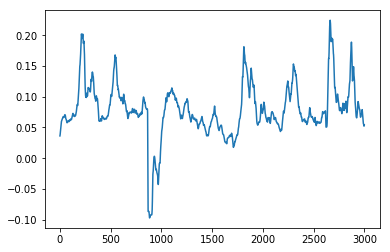

In [65]:
import matplotlib.pyplot as plt
plt.plot(pred_last[3500:6500])
plt.show()

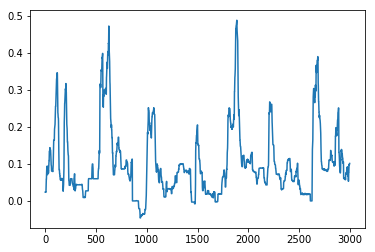

In [55]:
plt.plot(y[3500:6500,])
plt.show()

In [12]:
CCC_ = list()

for a in range(10):
    import tensorflow as tf
    from keras.models import Sequential
    from keras.layers.recurrent import LSTM
    from keras.layers.core import Dense,Activation,Dropout,RepeatVector
    from keras.layers import TimeDistributed
    from keras.layers import Bidirectional

    model = Sequential()
    model.add(LSTM(256,input_shape=(look_back,4521),go_backwards=True,activation = 'linear'))
    model.add(RepeatVector(5))
    model.add(LSTM(256,go_backwards=True,return_sequences = True))
    #model.add(LSTM(256,input_shape=(look_back,4521), return_sequences = True,go_backwards=True))
    #model.add(LSTM(128,input_shape=(look_back,4521) ,return_sequences = True,go_backwards=True))
#model.add(LSTM(200,input_shape=(look_back,4521), return_sequences = True,go_backwards=True))
#model.add(LSTM(200,input_shape=(look_back,4521), return_sequences = True,go_backwards=True))
        #model.add(LSTM(200,input_shape=(look_back,4521),return_sequences = True,go_backwards=True))
        #model.add(LSTM(200,input_shape=(look_back,4521),return_sequences = True,go_backwards=True))
        #model.add(LSTM(200,input_shape=(look_back,4521),return_sequences = True,go_backwards=True))
#model.add(LSTM(200,input_shape=(look_back,4521),go_backwards=True))
    model.add(TimeDistributed(Dense(1, activation= 'tanh' )))
    model.compile(loss= 'mse' , optimizer= 'adam' , metrics=[ 'acc' ])
    print(model.summary())
    
    
    
    
    
    from keras.callbacks import EarlyStopping, ModelCheckpoint

    earlystopper = EarlyStopping(patience=5, verbose=1)
    checkpointer = ModelCheckpoint('thesis_mult_task.h5', verbose=1, save_best_only=True)

    results = model.fit(TrainX,Train_shape,epochs = 4,validation_split=0.2,callbacks=[earlystopper, checkpointer],batch_size = 32)
    
    from keras.models import Model, load_model

    model = load_model('thesis_mult_task.h5')

    pred = model.predict(Devel_X)

    
    
    #output = list()

    #for i in range(len(pred)):
    
        #j = np.mean(pred[i])
        
        #m = np.mean(j)
    #new.append(m)
        #output.append(j)
        
    #output_ = np.array(output)

    pred_list = list()
    for i in range(len(pred)):
        if i < 4:
            k = i
            temp = 0
            a = 0
            for j in range(i):
                temp = temp + (pred[k,j])
            #print(temp)
                k = k-1
                a = a+1
            pred_list.append(temp/(a+1))
        else:
            k = i
            temp = 0
            for j in range(5):
                temp = temp+pred[k,j]
                k = k-1
            pred_list.append(temp/5)
            
            
    pred_last = np.array(pred_list)           

    
    
    
    
    
    x = pred_last

#x = a
    y = Devel_L[7:,0]
    x_mean = np.nanmean(x)
    y_mean = np.nanmean(y)

#np.nanmean((x - x_mean) * (y - y_mean)) 
    covariance = np.nanmean((x-x_mean)*(y-y_mean))
    
    x_var = 1.0 / (len(x)-1) * np.nansum((x-x_mean)**2) # Make it consistent with Matlab's nanvar (division by len(x)-1, not len(x)))
    y_var = 1.0 / (len(y)-1) * np.nansum((y-y_mean)**2)
    
    CCC = (2*covariance) / (x_var + y_var + (x_mean-y_mean)**2)

    x_std = np.sqrt(x_var)
    y_std = np.sqrt(y_var)
    PCC = covariance / (x_std * y_std)
    
    RMSE = np.sqrt(np.nanmean((x - y)**2))
    
    CCC_.append(CCC)
    print(CCC_)
    
    
        
        
    
    
    
    
    
    
    
    
    

c:\users\abhijit\anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               4892672   
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 5, 256)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 256)            525312    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 5, 1)              257       
Total params: 5,418,241
Trainable params: 5,418,241
Non-trainable params: 0
_________________________________________________________________
None
Train on 44868 samples, validate on 11217 samples
Epoch 1/4
44868/44868 [==============================] - 52s 1ms/step - loss: 0.0029 - acc: 0.0244 - val_loss: 0.0165 - val_acc: 0.0195

Epoch 00001: val_loss improved from inf to 0.01653, saving model to thes

Train on 44868 samples, validate on 11217 samples
Epoch 1/4
44868/44868 [==============================] - 49s 1ms/step - loss: 0.0023 - acc: 0.0244 - val_loss: 0.0138 - val_acc: 0.0195

Epoch 00001: val_loss improved from inf to 0.01383, saving model to thesis_mult_task.h5
Epoch 2/4
44868/44868 [==============================] - 47s 1ms/step - loss: 7.2149e-04 - acc: 0.0244 - val_loss: 0.0140 - val_acc: 0.0195

Epoch 00002: val_loss did not improve from 0.01383
Epoch 3/4
44868/44868 [==============================] - 47s 1ms/step - loss: 6.2566e-04 - acc: 0.0244 - val_loss: 0.0140 - val_acc: 0.0195

Epoch 00003: val_loss did not improve from 0.01383
Epoch 4/4
44868/44868 [==============================] - 46s 1ms/step - loss: 4.9621e-04 - acc: 0.0244 - val_loss: 0.0138 - val_acc: 0.0195

Epoch 00004: val_loss improved from 0.01383 to 0.01376, saving model to thesis_mult_task.h5
[0.3667831647429205, 0.4035963533205901, 0.3321410060380794, 0.3216654605617333, 0.37177767184966787]
______